In [206]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

import geopandas as gpd # 공간정보 라이브러리
print("geopandas version: {}".format(gpd.__version__))

# 파이썬 내장 라이브러리
import random
import datetime
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy

# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# interpolation 함수
import scipy.interpolate as spi
from scipy import stats

# model load
import pickle
# from sklearn.externals import joblib

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성
import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리

# 좌표계 정의/변환용 라이브러리
import pyproj

# 좌표간의 거리 구하기 위한 라이브러리
from haversine import haversine

# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# 뒤에서 overlay를 활용하기 위함. 설치 후 런타임 다시 시작할 것
import rtree
import pathlib
#from geoband import API

import mapclassify

Python version: 3.8.8 (tags/v3.8.8:024d805, Feb 19 2021, 13:18:16) [MSC v.1928 64 bit (AMD64)]
pandas version: 1.4.3
matplotlib version: 3.5.2
NumPy version: 1.22.4
SciPy version: 1.8.1
IPython version: 8.4.0
scikit-learn version: 1.1.1
tensorflow version: 2.9.1
geopandas version: 0.11.0
-------------------------


In [207]:
final = pd.read_csv('PreprocessData/final.csv')
life = pd.read_csv('PreprocessData/자치구_시간별_생활인구.csv', index_col=0)

In [208]:
merge_inner = pd.merge(final, life, how='left', left_on='자치구', right_on='RESC_CT_NM')
final = merge_inner

In [219]:
final.iloc[:, 5:]

,유년부양비,노년부양비,노령화지수,종합병원,병원,의원,치과병원,치과의원,한방병원,한방의원,...,woman_35_39_23,woman_40_44_23,woman_45_49_23,woman_50_54_23,woman_55_59_23,woman_60_64_23,woman_65_69_23,woman_70_23,RESD_CD,RESC_CT_NM
0,9.7,23.0,236.3,2,8,266,1,170,2,110,...,18564899,16211175,16984287,14922132,16991926,15178301,11501296,26557779,11530,구로구
1,14.0,26.2,186.9,3,32,1697,14,558,12,363,...,33728995,33113287,34213156,23625106,22121195,19794124,16191424,37713262,11680,강남구
2,6.9,26.4,382.6,1,10,223,1,127,0,98,...,12160349,11470770,14518247,13691461,15036403,13475885,10893165,31966020,11305,강북구
3,18.5,16.3,88.3,1,13,661,4,311,5,244,...,24550712,23985197,24551630,18257500,17555119,15717326,12546443,29900838,11650,서초구
4,9.2,40.6,442.1,4,13,256,4,149,1,150,...,15096520,12873151,13552036,12514604,13683125,12637390,9783367,28096179,11230,동대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,13.6,16.1,118.5,7,8,354,1,238,2,148,...,21738693,16845535,16523879,14849823,16849267,14335990,10578151,25691014,11560,영등포구
5344,8.3,10.8,129.9,4,17,410,3,225,6,189,...,28177399,23515181,23206995,19432883,22917652,21063605,16085841,38590216,11500,강서구
5345,21.5,16.0,74.3,1,13,661,4,311,5,244,...,24550712,23985197,24551630,18257500,17555119,15717326,12546443,29900838,11650,서초구
5346,9.1,17.7,195.3,2,17,574,4,327,4,252,...,39009758,33587568,34138876,28877594,32189324,28275209,21181503,43946790,11710,송파구


In [ ]:
import xgboost as xgb
X = final.iloc[:, 5:754]
y = final['심야약국']
model = xgb.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

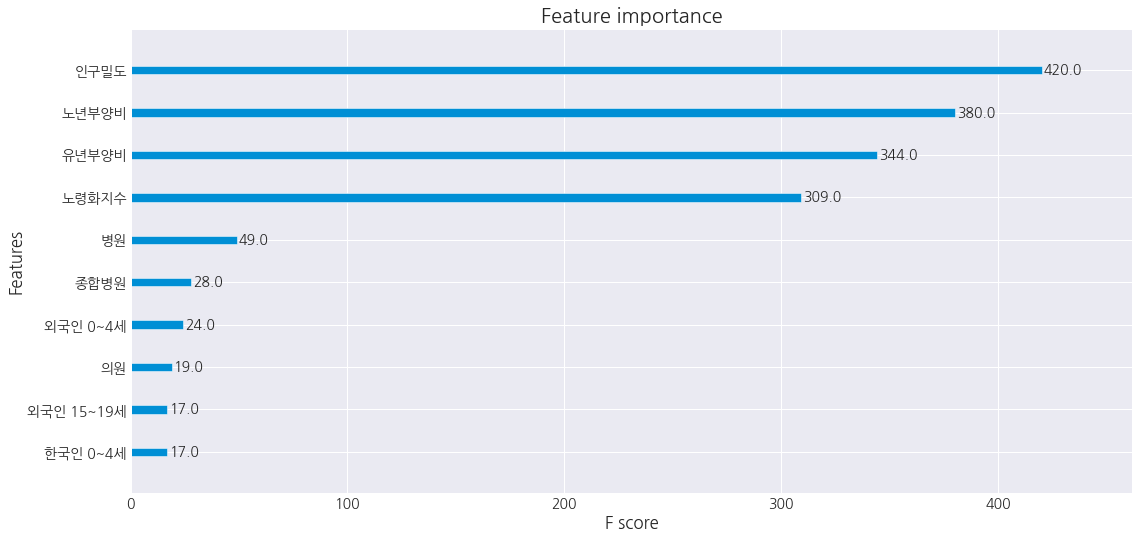

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (16, 8)

xgb.plot_importance(model, max_num_features=10)
plt.show()

In [ ]:
final = final[['약국명', '도로명주소', '자치구', '행정동', '심야약국', '인구밀도', '노년부양비', '유년부양비', '노령화지수', '병원', '종합병원']]
df_sorted_by_values = final.sort_values(by=['인구밀도', '노년부양비', '유년부양비', '노령화지수', '병원', '종합병원'] ,ascending=False)

In [223]:
# 상위 1000개 피쳐에 대한 약국 중 심야약국은 22개에 불과함.
# 상위 2000개 피쳐에 대한 약국 중 심야약국은 40개에 불과함.
# 나머지 94개의 심야갹국은 하위 3000개에 존재함.
df_sorted_by_values['심야약국'][:1000].sum()

for i in range(1, 3):
    print("피처 중요도 상위", i*1000, "곳의 약국 중 ", df_sorted_by_values['심야약국'][:i*1000].sum(), "개 만이 심야약국")

피처 중요도 상위 1000 곳의 약국 중  22 개 만이 심야약국
피처 중요도 상위 2000 곳의 약국 중  40 개 만이 심야약국


In [ ]:
df_sorted_by_values2 = df_sorted_by_values.groupby(by='자치구').sum()
df_sorted_by_values2 = df_sorted_by_values2.sort_values(by=['인구밀도', '노년부양비', '유년부양비', '노령화지수', '병원', '종합병원'] ,ascending=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_sorted_by_values2)
df_sorted_by_values3 = scaler.transform(df_sorted_by_values2)
df_sorted_by_values3 = pd.DataFrame(df_sorted_by_values3, columns=df_sorted_by_values2.columns, index=list(df_sorted_by_values2.index.values))

In [ ]:
def weights(df):
    a = df['인구밀도'] * 420
    b = df['노년부양비'] * 380
    c = df['유년부양비'] * 344
    e = df['노령화지수'] * 309
    f = df['병원'] * 44
    g = df['종합병원'] * 28
    
    return (a + b + c + e + f + g) / 100

In [ ]:
df_sorted_by_values3['weights'] = weights(df_sorted_by_values3)
df_sorted_by_values3['필요도'] = df_sorted_by_values3['weights'] / df_sorted_by_values3['심야약국']

In [ ]:
df_sorted_by_values3

,심야약국,인구밀도,노년부양비,유년부양비,노령화지수,병원,종합병원,weights,필요도
송파구,0.785714,1.000000,0.733747,0.751525,0.611351,0.404661,0.406349,11.754390,14.960133
강남구,0.785714,0.844653,1.000000,1.000000,1.000000,1.000000,0.782540,14.536654,18.501196
동대문구,0.500000,0.666865,0.644461,0.315102,0.782735,0.218746,0.592593,9.014562,18.029125
강서구,0.142857,0.664190,0.432922,0.417246,0.386016,0.274430,0.560847,7.340606,51.384241
강동구,0.357143,0.637790,0.429726,0.394449,0.334189,0.210635,0.398413,6.905462,19.335293
관악구,0.642857,0.595122,0.267290,0.094170,0.615862,0.147290,0.121693,5.841054,9.086084
영등포구,0.571429,0.563348,0.443163,0.385226,0.401998,0.123471,1.000000,6.951759,12.165578
노원구,0.714286,0.517156,0.401460,0.348389,0.259447,0.073259,0.365079,5.832213,8.165098
구로구,0.357143,0.488324,0.291863,0.211709,0.261731,0.085876,0.208466,4.793222,13.421022
은평구,0.285714,0.487107,0.416076,0.282564,0.367027,0.126046,0.232804,5.853717,20.488008


In [ ]:
df_sorted_by_values4 = df_sorted_by_values3.sort_values(by=['필요도'], ascending=False)

In [ ]:
df_sorted_by_values4
df_sorted_by_values4.replace([np.inf, -np.inf], 99, inplace=True)

In [226]:
df_sorted_by_values4.to_csv("weights.csv")